# Bike Rentals Prediction - Baseline Models

Build a model that predicts number of bike rentals on a particular day, given the parameters.

In this notebook I will build basic models which will be used as a baseline for future predictions.

In [ ]:
import os
os.chdir('..')

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

import scikitplot as skplt
from scikitplot.estimators import plot_feature_importances

import eli5
from eli5.sklearn.explain_weights import explain_decision_tree, explain_rf_feature_importance
from eli5.xgboost import explain_weights_xgboost

np.random.seed(9)

plt.style.use('ggplot')

In [2]:
df = pd.read_parquet('data/data_predictors.parquet')

In [3]:
df['season_f'] = pd.factorize(df['season'])[0]
df['holiday_f'] = pd.factorize(df['holiday'])[0]

In [4]:
df = df.fillna(-100)

In [5]:
selected_features = ['temperature_mean', 'wind_mean', 'clouds_cloudy_sum', 'clouds_partly cloudy_sum', 'clouds_clear_sum', 'month', 'season_f', 'holiday_f']

y = df['rentals_count_sum'].values
X = df[selected_features].values

In [6]:
def custom_rmse(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred[ y_pred < 0 ] = 0

    return np.sqrt(mean_squared_error(y_test, y_pred))

In [7]:
model_linear = LinearRegression()
scores = cross_val_score(model_linear, X, y, cv=5, scoring=custom_rmse)
np.mean(scores), np.std(scores)

(3905.5543228066804, 1012.6483639478996)

In [8]:
model_decisiontree = DecisionTreeRegressor()
scores = cross_val_score(model_decisiontree, X, y, cv=5, scoring=custom_rmse)
np.mean(scores), np.std(scores)

(4285.364679011149, 569.1278056165578)

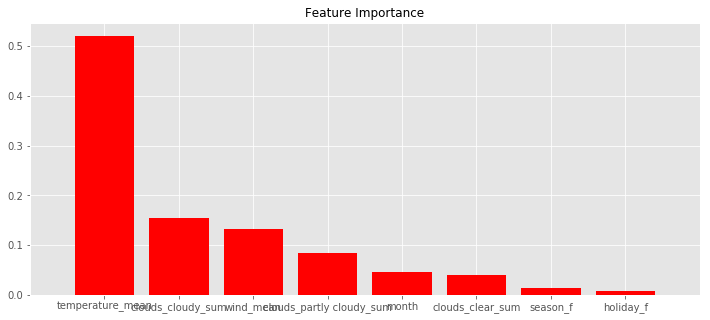

In [9]:
model_decisiontree.fit(X, y)
plot_feature_importances(model_decisiontree, feature_names=selected_features, figsize=(12, 5))

In [10]:
model_randomforest = RandomForestRegressor()
scores = cross_val_score(model_randomforest, X, y, cv=5, scoring=custom_rmse)
np.mean(scores), np.std(scores)

(3439.0193409526, 972.8074684366744)

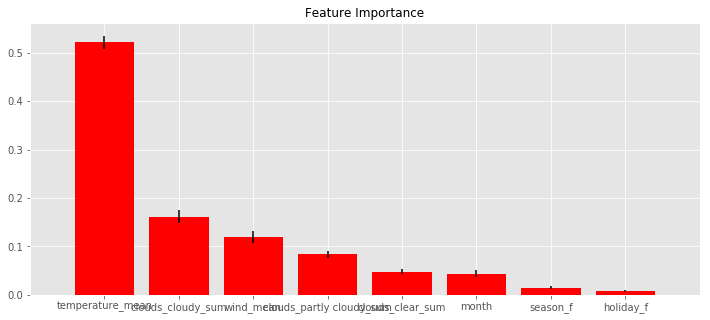

In [11]:
model_randomforest.fit(X, y)
plot_feature_importances(model_randomforest, feature_names=selected_features, figsize=(12, 5));

In [12]:
explain_rf_feature_importance(model_randomforest, feature_names=selected_features)

Weight,Feature
0.5215 ± 0.0262,temperature_mean
0.1611 ± 0.0268,clouds_cloudy_sum
0.1194 ± 0.0238,wind_mean
0.0836 ± 0.0158,clouds_partly cloudy_sum
0.0482 ± 0.0103,clouds_clear_sum
0.0435 ± 0.0143,month
0.0149 ± 0.0065,season_f
0.0077 ± 0.0041,holiday_f


In [13]:
model_xgboost = xgb.XGBRegressor(objective='reg:squarederror')
scores = cross_val_score(model_xgboost, X, y, cv=5, scoring=custom_rmse)
np.mean(scores), np.std(scores)

(3263.008585126515, 1094.8665444102146)

In [14]:
model_xgboost.fit(X, y)
explain_weights_xgboost(model_xgboost, feature_names=selected_features, importance_type='gain')

Weight,Feature
0.5109,temperature_mean
0.1528,clouds_cloudy_sum
0.0983,season_f
0.0793,clouds_partly cloudy_sum
0.0608,clouds_clear_sum
0.0396,holiday_f
0.0314,wind_mean
0.0269,month
